In [14]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

service = Service()
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode
driver = webdriver.Chrome(service=service, options=options)

# Target URL
url = "https://www.darpa.mil/about/offices/i2o#programs"
driver.get(url)

# Click "Show More" button up to 20 times or until it disappears
max_clicks = 20
for _ in range(max_clicks):
    try:
        show_more_button = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.XPATH, "//button[contains(text(),'Show More')]"))
        )
        show_more_button.click()
        time.sleep(2)  # Allow content to load
    except:
        print("No more 'Show More' button found or max clicks reached.")
        break

# Find all program titles
programs = driver.find_elements(By.XPATH, "//h3[contains(@class, 'text-2xl font-semibold')]")

# Store results in a DataFrame
data = []

for program in programs:
    try:
        program_name = program.text
        program_container = program.find_element(By.XPATH, "./ancestor::div[@class='text-black']")  # Move two levels up
        
        # Find Program Manager
        pm_label = program_container.find_element(By.XPATH, ".//p[contains(text(),'Program Manager')]")
        pm_name = pm_label.find_element(By.XPATH, "./following-sibling::p").text.strip()

        # Get description
        description_div = program_container.find_element(By.XPATH, ".//div[contains(@class, 'relative h-[144px] overflow-hidden')]")
        description = " ".join([p.text for p in description_div.find_elements(By.TAG_NAME, "p")])

        # Get program details link
        details_link_element = program_container.find_element(By.XPATH, ".//a[contains(text(),'Program Details')]")
        details_link = details_link_element.get_attribute("href")

        # Store data
        data.append([program_name, pm_name, description, details_link])
    
    except Exception as e:
        print(f"Skipping a program due to an error: {e}")

# Convert to DataFrame and save
df = pd.DataFrame(data, columns=["Program Name", "Program Manager", "Description", "Details Link"])
df.to_csv("darpa_programs.csv", index=False)

# Close the driver
driver.quit()

print("Scraping complete. Data saved to darpa_programs.csv.")

No more 'Show More' button found or max clicks reached.
Scraping complete. Data saved to darpa_programs.csv.


In [37]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import re

# Setup Chrome WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode
driver = webdriver.Chrome(options=options)

# Target URL
url = "https://www.darpa.mil/about/offices/bto#programs"
driver.get(url)

# Click "Show More" button up to 20 times or until it disappears
max_clicks = 30
for _ in range(max_clicks):
    try:
        show_more_button = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.XPATH, "//button[contains(text(),'Show More')]"))
        )
        show_more_button.click()
        time.sleep(2)  # Allow content to load
    except:
        print("No more 'Show More' button found or max clicks reached.")
        break

# Find all program titles
programs = driver.find_elements(By.XPATH, "//h3[contains(@class, 'text-2xl font-semibold')]")

# Store results in a DataFrame
data = []

for program in programs:
    try:
        program_name = program.text
        program_container = program.find_element(By.XPATH, "./ancestor::div[@class='text-black']")  # Move up to program container

        # Find Program Manager
        try:
            pm_label = program_container.find_element(By.XPATH, ".//p[contains(text(),'Program Manager')]")
            print('pm_label', pm_label)
            pm_name_element = pm_label.find_element(By.XPATH, "./following-sibling::p[@class='pb-0 text-xl font-semibold']")
            print(f"pm_name_element.get_attribute('outerHTML'): {pm_name_element.get_attribute('outerHTML')}")
            print('pm_name_element', pm_name_element)
            pm_name_html = pm_name_element.get_attribute('outerHTML')
            pm_name_match = re.search(r">([^<>]+)<", pm_name_html)
            pm_name = pm_name_match.group(1).strip() if pm_name_match else "Not Found"
            print('pm_name', pm_name)
        except:
            pm_name = "Not Found"

        # Find description
        try:
            description_div = program_container.find_element(By.XPATH, ".//div[contains(@class, 'relative h-[144px] overflow-hidden mb-7')]")
            #print(f"pm_name_element.get_attribute('outerHTML'): {description_div.get_attribute('outerHTML')}")
            
            description_html = description_div.get_attribute('outerHTML')
            description_match = re.findall(r"<p>(.*?)</p>|<li>(.*?)</li>", description_html, re.DOTALL)
            description = " ".join(filter(None, [item for sublist in description_match for item in sublist])).strip()
        except:
            description = "Not Found"
            print(description)

        # Find program details link
        try:
            details_link_element = program_container.find_element(By.XPATH, ".//a[contains(text(),'Program Details')]")
            details_link = details_link_element.get_attribute("href")
        except:
            details_link = "Not Found"

        data.append([program_name, pm_name, description, details_link])
    
    except Exception as e:
        print(f"Skipping a program due to an error: {e}")

# Convert to DataFrame and save
df = pd.DataFrame(data, columns=["Program Name", "Program Manager", "Description", "Details Link"])
df.to_csv("darpa_BTO_programs.csv", index=False)

# Close the driver
driver.quit()

print("Scraping complete. Data saved to darpa_programs.csv.")

No more 'Show More' button found or max clicks reached.
pm_label <selenium.webdriver.remote.webelement.WebElement (session="2452a57eebed538d90c129a5fd470daa", element="f.776F58F991DAD842FC78BF3AF404E556.d.F40EA7D384B465D4270BDE31D950064F.e.893")>
pm_name_element.get_attribute('outerHTML'): <p class="pb-0 text-xl font-semibold"> Christopher Bettinger</p>
pm_name_element <selenium.webdriver.remote.webelement.WebElement (session="2452a57eebed538d90c129a5fd470daa", element="f.776F58F991DAD842FC78BF3AF404E556.d.F40EA7D384B465D4270BDE31D950064F.e.894")>
pm_name Christopher Bettinger
pm_label <selenium.webdriver.remote.webelement.WebElement (session="2452a57eebed538d90c129a5fd470daa", element="f.776F58F991DAD842FC78BF3AF404E556.d.F40EA7D384B465D4270BDE31D950064F.e.898")>
pm_name_element.get_attribute('outerHTML'): <p class="pb-0 text-xl font-semibold"> Pedro Irazoqui</p>
pm_name_element <selenium.webdriver.remote.webelement.WebElement (session="2452a57eebed538d90c129a5fd470daa", element="f.77

In [38]:
df

,Program Name,Program Manager,Description,Details Link
0,ADAPTER: ADvanced Acclimation and Protection T...,Christopher Bettinger,"Warfighters are travelers, and the bodily inco...",https://www.darpa.mil/research/programs/advanc...
1,AWARE: Alert WARfighter Enablement,Pedro Irazoqui,"Active-duty conditions may lead to sleep loss,...",https://www.darpa.mil/research/programs/alert-...
2,ABC: Anesthetics for Battlefield Care,Michael Feasel,The Anesthetics for Battlefield Care (ABC) pro...,https://www.darpa.mil/research/programs/anesth...
3,Arcadia,Tiffany Prest,Bacteria are the most abundant and diverse lif...,https://www.darpa.mil/research/programs/arcadia
4,AMPHORA: Assured Microbial Preservation in Har...,Tiffany Prest,The AMPHORA program seeks to develop a portabl...,https://www.darpa.mil/research/programs/assure...
5,BETR: Bioelectronics for Tissue Regeneration,Leonard Tender,The Bioelectronics for Tissue Regeneration (BE...,https://www.darpa.mil/research/programs/bioele...
6,BRACE: Bio-inspired Restoration of Aged Concre...,Matthew Pava,The Bio-inspired Restoration of Aged Concrete ...,https://www.darpa.mil/research/programs/bio-in...
7,BLUE: BioLogical Undersea Energy,Leonard Tender,The BioLogical Undersea Energy (BLUE) program ...,https://www.darpa.mil/research/programs/biolog...
8,"B-SURE: Biomanufacturing: Survival, Utility, a...",Leonard Tender,The DoD has a role in orbital and lunar missio...,https://www.darpa.mil/research/programs/bioman...
9,BG+: Bridging the Gap Plus,Pedro Irazoqui,The Bridging the Gap Plus (BG+) program aims t...,https://www.darpa.mil/research/programs/bridgi...


In [33]:
print(f"pm_name_element.get_attribute('outerHTML'): {description_div.get_attribute('outerHTML')}")

MaxRetryError: HTTPConnectionPool(host='localhost', port=60186): Max retries exceeded with url: /session/8517dcb0595acb4c909fe4d0b75f739c/execute/sync (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x179a27ad0>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [18]:
description

''

In [40]:
import requests
import pandas as pd

def fetch_uniprot_data(uniprot_ids):
    base_url = "https://rest.uniprot.org/uniprotkb/"
    results = []
    
    for uniprot_id in uniprot_ids:
        url = f"{base_url}{uniprot_id}.txt"
        response = requests.get(url)
        
        if response.status_code == 200:
            data = response.text
            
            # Extracting name
            name = "N/A"
            gene = "N/A"
            pathways = "N/A"
            function = "N/A"
            sequence = "N/A"
            
            lines = data.split('\n')
            for i, line in enumerate(lines):
                if line.startswith("ID"):
                    name = line.split()[1]
                elif line.startswith("GN   Name="):
                    gene = line.split("=")[1].split(";")[0]
                elif line.startswith("CC   -!- FUNCTION:"):
                    function = line.split("FUNCTION:")[1].strip()
                elif line.startswith("DR   Reactome;"):
                    pathway = line.split(";")[1].strip()
                    pathways = pathways + "; " + pathway if pathways != "N/A" else pathway
                elif line.startswith("SQ   SEQUENCE"):
                    sequence = "".join(lines[i+1:]).replace(" ", "").strip()
                    break
            
            results.append({
                "UniProt ID": uniprot_id,
                "Protein Name": name,
                "Gene Name": gene,
                "Pathways": pathways,
                "Function": function,
                "Sequence": sequence
            })
        else:
            print(f"Failed to retrieve data for {uniprot_id}")
    
    return pd.DataFrame(results)

# List of UniProt IDs
uniprot_ids = ['Q9Y265', 'Q9NR46', 'P09914', 'Q13421', 'P80188', 'O00233', 'P60763', 'P49406', 'Q9BR76', 'O14672', 'P17936', 'Q7L5N1', 'Q15717', 'P30153', 'Q8NC56', 'P00167', 'Q96BP2', 'Q14694', 'A1A5D9', 'Q8IXQ6', 'P78318', 'Q13310', 'P53007', 'P62070', 'P80217', 'Q9UJY5', 'P49821', 'O43865', 'P42224', 'Q96MU7', 'Q9P258', 'Q96TA2', 'P39019', 'O95831', 'Q53GD3', 'Q9UIA9']

# Fetch data
df = fetch_uniprot_data(uniprot_ids)

In [43]:
import requests
import re

# List of UniProt IDs
uniprot_ids = [
    'Q9Y265', 'Q9NR46', 'P09914', 'Q13421', 'P80188', 'O00233', 'P60763', 
    'P49406', 'Q9BR76', 'O14672', 'P17936', 'Q7L5N1', 'Q15717', 'P30153', 
    'Q8NC56', 'P00167', 'Q96BP2', 'Q14694', 'A1A5D9', 'Q8IXQ6', 'P78318', 
    'Q13310', 'P53007', 'P62070', 'P80217', 'Q9UJY5', 'P49821', 'O43865', 
    'P42224', 'Q96MU7', 'Q9P258', 'Q96TA2', 'P39019', 'O95831', 'Q53GD3', 'Q9UIA9'
]

# Function to scrape UniProt TXT format
def scrape_uniprot_txt(uniprot_id):
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.txt"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    return None

# Function to extract relevant fields
def parse_uniprot_txt(text):
    name, gene, function, sequence = None, None, "", ""
    capture_function, capture_sequence = False, False
    
    for line in text.split('\n'):
        if line.startswith("ID   "):
            name = line.split()[1]
        elif line.startswith("GN   Name="):
            gene = line.split("=")[1].split(";")[0]
        elif line.startswith("CC   -!- FUNCTION:"):
            capture_function = True
            function += re.sub("CC   -!- FUNCTION: ", "", line) + " "
        elif capture_function:
            if line.startswith("CC   -!-") or not line.startswith("CC   "):
                capture_function = False
            else:
                function += re.sub("CC   ", "", line) + " "
        elif line.startswith("SQ   SEQUENCE"):
            capture_sequence = True
        elif capture_sequence:
            if line.strip() and not line.startswith("//"):
                sequence += line.strip().replace(" ", "")
    
    return name, gene, function.strip(), sequence.strip()

# Collect results
results = []
for uniprot_id in uniprot_ids:
    text = scrape_uniprot_txt(uniprot_id)
    if text:
        name, gene, function, sequence = parse_uniprot_txt(text)
        results.append([uniprot_id, name, gene, function, sequence])

# Save to file
import pandas as pd

df = pd.DataFrame(results, columns=["UniProt ID", "Name", "Gene", "Function", "Sequence"])
#df.to_csv("uniprot_data.csv", index=False)


In [42]:
df.to_csv("uniprot_data_021125.csv", index=False)


In [24]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
a_m: Path = Path('/Users/christopherpuglisi/Netrias/Projects/hyperparameter_optimizer/tests/aethr_m_subset_aethr_features_overlapped_02102025.pkl')

In [3]:
a_c: Path = Path('/Users/christopherpuglisi/Netrias/Projects/hyperparameter_optimizer/tests/aethr_subset_aethr_features_overlapped_01312025.pkl')

In [4]:
c_c: Path = Path('/Users/christopherpuglisi/Netrias/Projects/hyperparameter_optimizer/tests/cares_subset_aethr_features_overlapped_01312025.pkl')

In [57]:
with open(a_m, 'rb') as f:
    a_m_df = pickle.load(f)

In [58]:
with open(a_c, 'rb') as f:
    a_c_df = pickle.load(f)

In [59]:
with open(c_c, 'rb') as f:
    c_c_df = pickle.load(f)

In [60]:
a_m_features = list(a_m_df.iloc[:,11:].columns)
a_c_features = list(a_c_df.iloc[:,29:].columns)
c_c_features = list(c_c_df.iloc[:,3:].columns)

In [61]:
common_features = list(set(a_m_df.columns) & set(a_c_df.columns) & set(c_c_df.columns))

# Add dataset labels before merging
a_m_df["Dataset"] = "AETHR Measles"
a_c_df["Dataset"] = "AETHR Covid"
c_c_df["Dataset"] = "CARES Covid"

# Merge datasets while retaining dataset labels
merged_df = pd.concat([
    a_m_df[["Dataset"] + common_features], 
    a_c_df[["Dataset"] + common_features], 
    c_c_df[["Dataset"] + common_features]
], axis=0).reset_index(drop=True)

# Extract dataset labels for coloring
dataset_labels = merged_df["Dataset"]
merged_df = merged_df.drop(columns=["Dataset"]) 

In [62]:
# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(merged_df)

# Extract explained variance
explained_variance = pca.explained_variance_ratio_

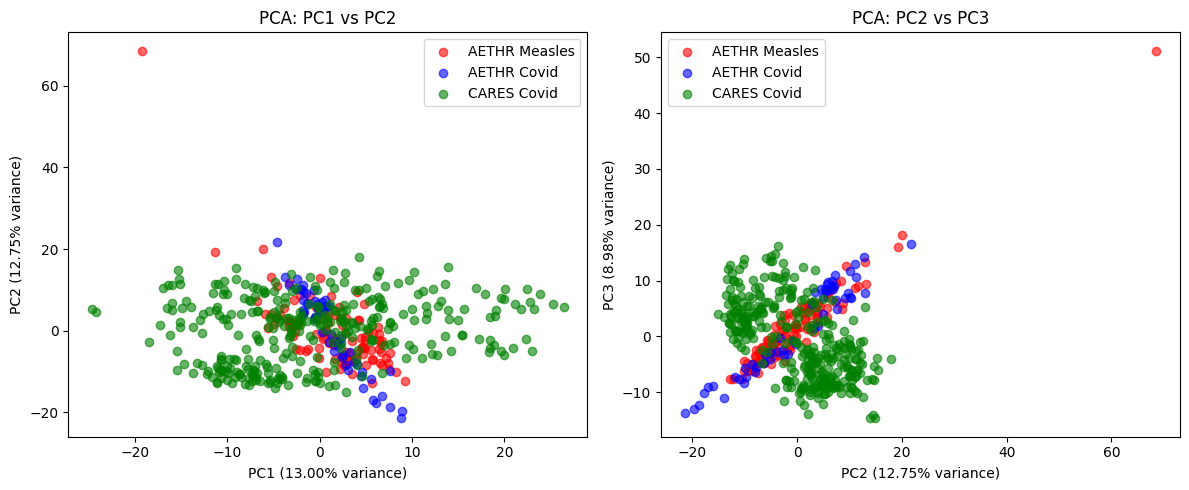

In [63]:
dataset_colors = {
    "AETHR Measles": "red",
    "AETHR Covid": "blue",
    "CARES Covid": "green"
}
colors = [dataset_colors[label] for label in dataset_labels]

# Create PCA plots
plt.figure(figsize=(12, 5))

# Plot PC1 vs PC2
plt.subplot(1, 2, 1)
for dataset, color in dataset_colors.items():
    mask = dataset_labels == dataset
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=dataset, color=color, alpha=0.6)
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% variance)")
plt.title("PCA: PC1 vs PC2")
plt.legend()

# Plot PC2 vs PC3
plt.subplot(1, 2, 2)
for dataset, color in dataset_colors.items():
    mask = dataset_labels == dataset
    plt.scatter(X_pca[mask, 1], X_pca[mask, 2], label=dataset, color=color, alpha=0.6)
plt.xlabel(f"PC2 ({explained_variance[1]*100:.2f}% variance)")
plt.ylabel(f"PC3 ({explained_variance[2]*100:.2f}% variance)")
plt.title("PCA: PC2 vs PC3")
plt.legend()

plt.tight_layout()
plt.show()